In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import numpy as np
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import statistics
import seaborn as sns

In [2]:
dat = pd.read_csv('CC_GENERAL.csv')

In [3]:
dat.shape

(8950, 18)

In [4]:
c = [print(cols) for cols in dat]

CUST_ID
BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE


In [5]:
dat.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
dat.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
dat.dropna(inplace = True)

dat.shape

(8636, 18)

In [8]:
dat.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


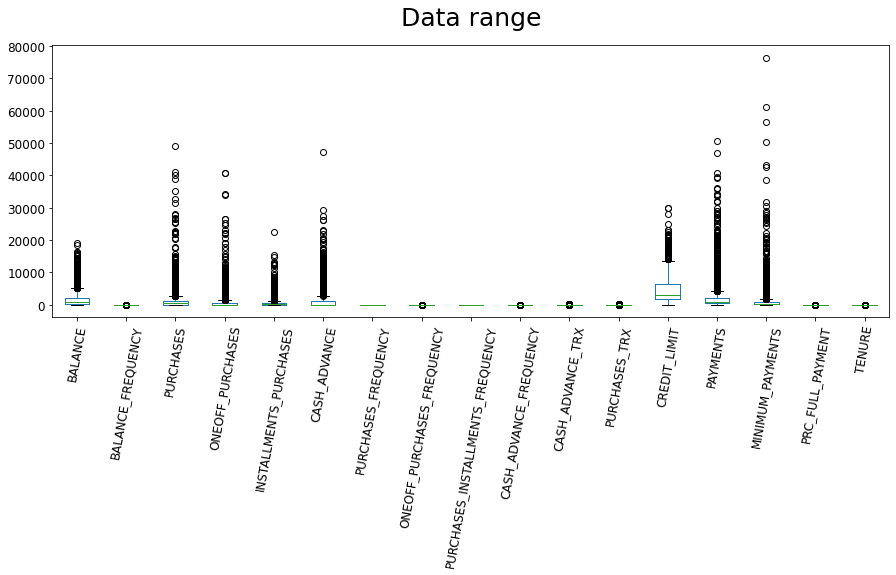

In [9]:
# User defined function to create boxplot

def my_boxplot(DAT, TITLE):
    plt.figure(figsize = (15,5))    # figsize must come before the plot
    DAT.boxplot(grid = False, rot = 80, fontsize = 12)
    plt.title(TITLE, fontsize = 25, pad = 20) # 'pad' increases distance between title and plot
    
my_boxplot(dat, "Data range")

In [10]:
dat_absolute_values = dat[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                           'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]
dat_frequency = dat[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']]

In [11]:
def subplot_boxplots(dat_frequency, FREQ_TITLE, dat_absolute_values, VAL_TITLE):
    plt.figure(figsize=(15,8))

    plt.subplot(121)
    # Modify left plot here
    freq = dat_frequency.boxplot(grid = False, showfliers=False)
    plt.setp(freq.get_xticklabels(), rotation=45, ha = 'right')
    plt.title(FREQ_TITLE)
    
    plt.subplot(122)
    # Modify right plot here
    val = dat_absolute_values.boxplot(grid = False, showfliers=False)
    plt.setp(val.get_xticklabels(), rotation=45, ha = 'right')
    plt.title(VAL_TITLE)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=3)
    
    plt.tight_layout()

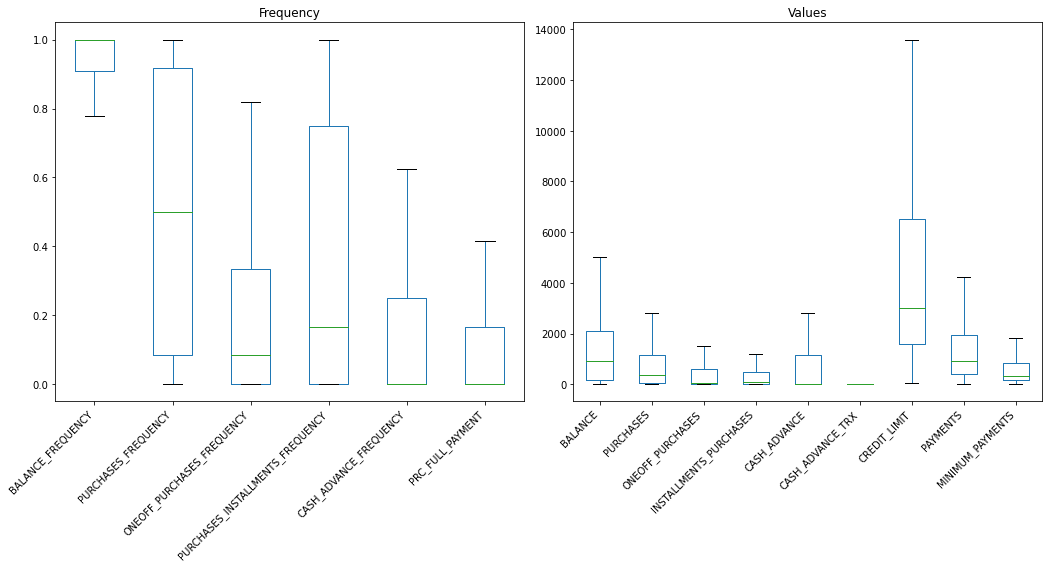

In [12]:
subplot_boxplots(dat_frequency, "Frequency", dat_absolute_values, "Values")

TENURE unique values:  [12  8 11  9 10  6  7]


<AxesSubplot:ylabel='Frequency'>

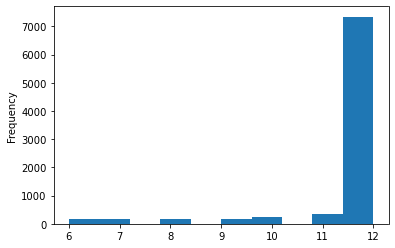

In [30]:
print("TENURE unique values: ", dat.TENURE.unique())
dat.TENURE.plot.hist()

In [14]:
dat.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [15]:
# Tenure dropped due to nearly all values being 12
dat_normalised = dat.drop(['CUST_ID', 'TENURE'], axis = 1)

# Normalise data for cluster analysis
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dat_normalised)
# Run the normalizer on the dataframe
dat_normalised = pd.DataFrame(x_scaled, columns = dat_normalised.columns)

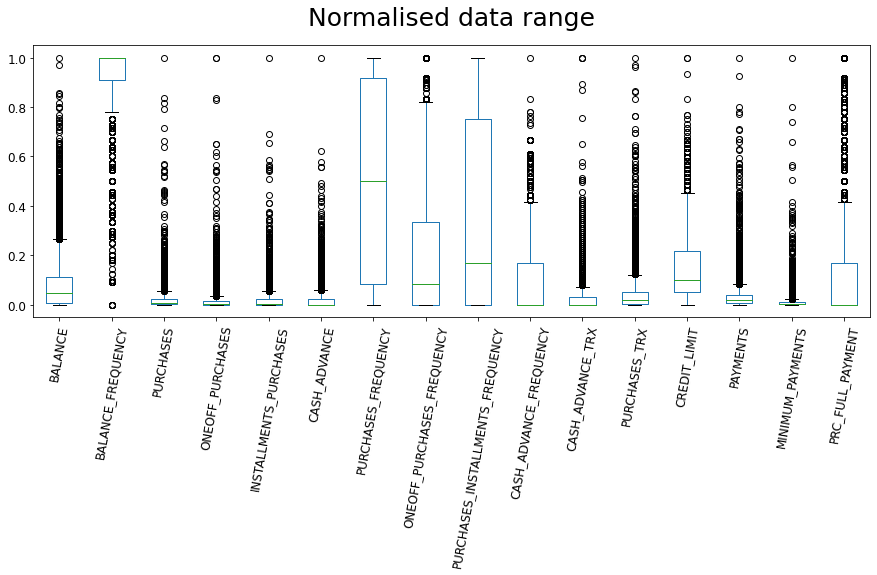

In [16]:
my_boxplot(dat_normalised, "Normalised data range")

# Hierarchical cluster analysis

In [17]:
# Sample data to speed up clustering 
dat_sample = dat_normalised.sample(frac = 0.1, random_state = 777)

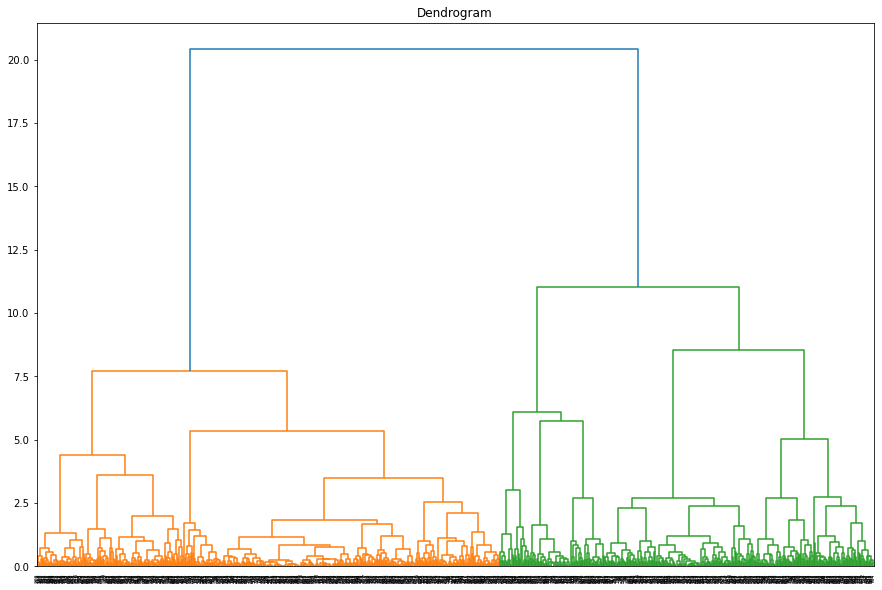

In [18]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(dat_sample, method='ward'))

In [19]:
cluster_number = int(input("Total number of clusters:"))

Total number of clusters:5


In [20]:
# Predict the clusters that each observation belongs to
cluster = AgglomerativeClustering(n_clusters=cluster_number, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(dat_sample)

# Add cluster labels to dataframe
dat_sample['CLUSTER_LABELS'] = cluster_labels

In [21]:
# Gradient boost user defined function

def xgb_loop(Y, X):
    accuracy_list = []
    for item in range(10):
        test_size = 0.33
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size)
        # fit model to training data
        model = xgboost.XGBClassifier()
        model.fit(X_train, np.ravel(y_train))
        # make predictions for test data
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        # evaluate predictions
        accuracy = accuracy_score(y_test, predictions)
        accuracy_list.append(accuracy)    
    model_accuracy = statistics.mean(accuracy_list)    
    return(round(model_accuracy * 100, 2))

In [22]:
dat_sample.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'CLUSTER_LABELS'],
      dtype='object')

In [23]:
X = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [24]:
# Classify DV's to determine relevance to cluster

# Create dataframe to hold gboost scores
gboost_scores = pd.DataFrame()

# Create new 'index' column in dat_sample merge cluster_classifier dataframe on index
dat_sample['index'] = dat_sample.index

# Create new classifier variable for each cluster in dat
for c in range(cluster_number):
    cluster = dat_sample.query('CLUSTER_LABELS == {}'.format(c))
    cluster['classifier'] = 1
    cluster_classifier = pd.DataFrame(cluster['classifier'])
    cluster_classifier['index'] = cluster_classifier.index
    dat_sample2 = pd.merge(dat_sample, cluster_classifier['classifier'], left_index = True, right_index = True, how = 'outer')
    dat_sample2.classifier.fillna(value = 0, inplace = True)
    
    # Perform gradient boost using each cluster classifier
    scores_list = []
    for xvar in X:
        y = dat_sample2[['classifier']]
        x = dat_sample2[[xvar]]
        scores_list.append(xgb_loop(y, x))
    gboost_scores["Cluster " + str(c)] = scores_list
    
gboost_scores.index = X

<ipython-input-24-bc2730c8ea2b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['classifier'] = 1


#### Cluster size

In [25]:
# Calculate size of clusters
clusters = {}

for cl in range(cluster_number):
    clusters["Cluster_" + str(cl)] = dat_sample.query('CLUSTER_LABELS == {}'.format(cl))
    cluster_len = clusters["Cluster_" + str(cl)]
    print("Cluster", cl, "size: ", len(cluster_len), "--", str(round((len(cluster_len) / len(dat_sample)) * 100 )) + "%")

Cluster 0 size:  108 -- 12%
Cluster 1 size:  121 -- 14%
Cluster 2 size:  326 -- 38%
Cluster 3 size:  157 -- 18%
Cluster 4 size:  152 -- 18%


### Gradient boost scores
#### Min / max range across dataframe

In [26]:
cm = sns.light_palette("red", as_cmap=True, n_colors=10)
gboost_scores.style.background_gradient(cmap=cm, vmin = gboost_scores.min().min(), vmax = gboost_scores.max().max()) 

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
BALANCE,84.410000,82.760000,57.970000,77.970000,77.380000
BALANCE_FREQUENCY,87.340000,86.080000,60.770000,81.750000,81.400000
PURCHASES,83.920000,84.580000,86.400000,76.850000,77.760000
ONEOFF_PURCHASES,83.950000,83.110000,62.030000,78.920000,79.830000
INSTALLMENTS_PURCHASES,82.970000,83.150000,85.380000,77.970000,77.550000
CASH_ADVANCE,87.410000,83.990000,68.780000,78.740000,79.790000
PURCHASES_FREQUENCY,87.870000,86.750000,96.470000,81.080000,93.180000
ONEOFF_PURCHASES_FREQUENCY,87.340000,90.870000,65.700000,80.770000,80.870000
PURCHASES_INSTALLMENTS_FREQUENCY,87.410000,84.300000,86.220000,83.360000,84.060000
CASH_ADVANCE_FREQUENCY,87.130000,86.290000,72.060000,81.680000,82.030000


#### Min / max range within columns

In [27]:
# cm = sns.light_palette("red", as_cmap=True, n_colors=10)
# gboost_scores.style.background_gradient(cmap=cm) 

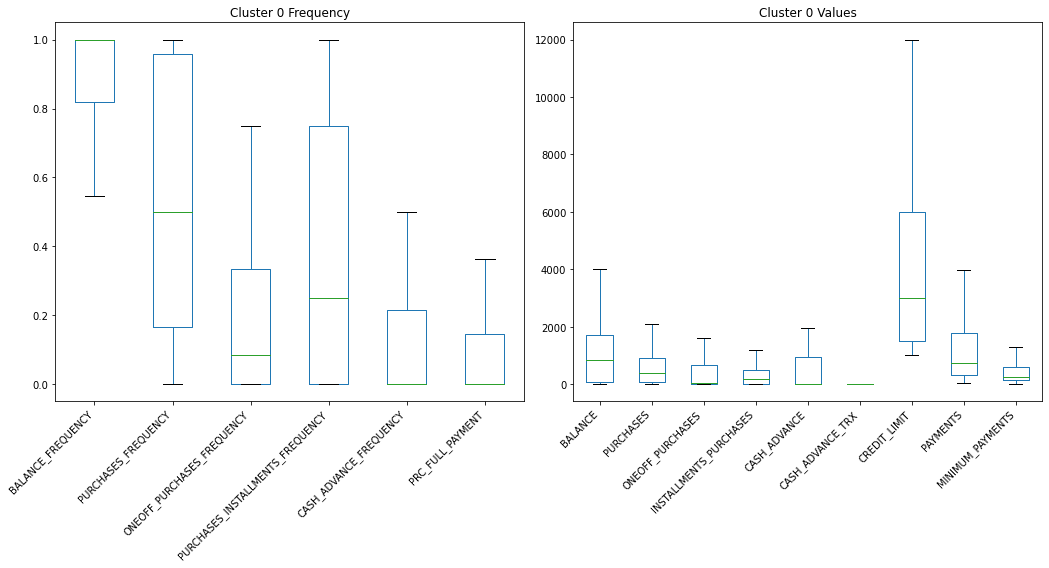

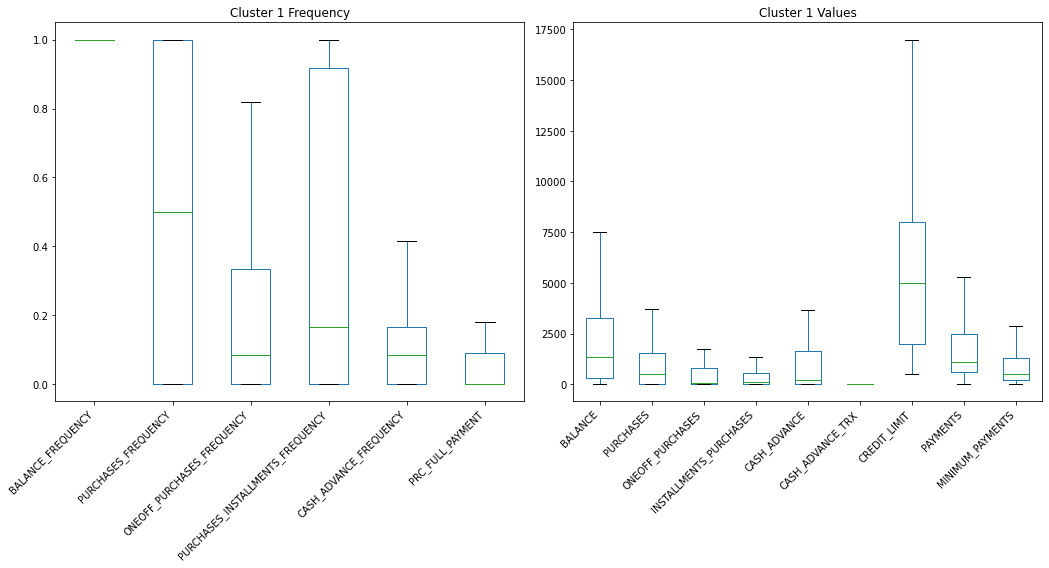

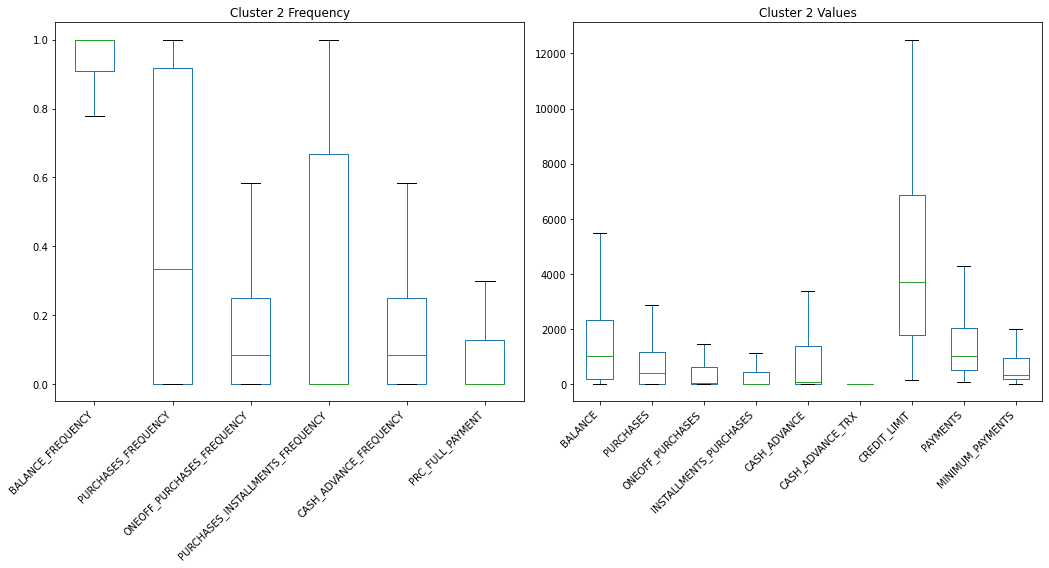

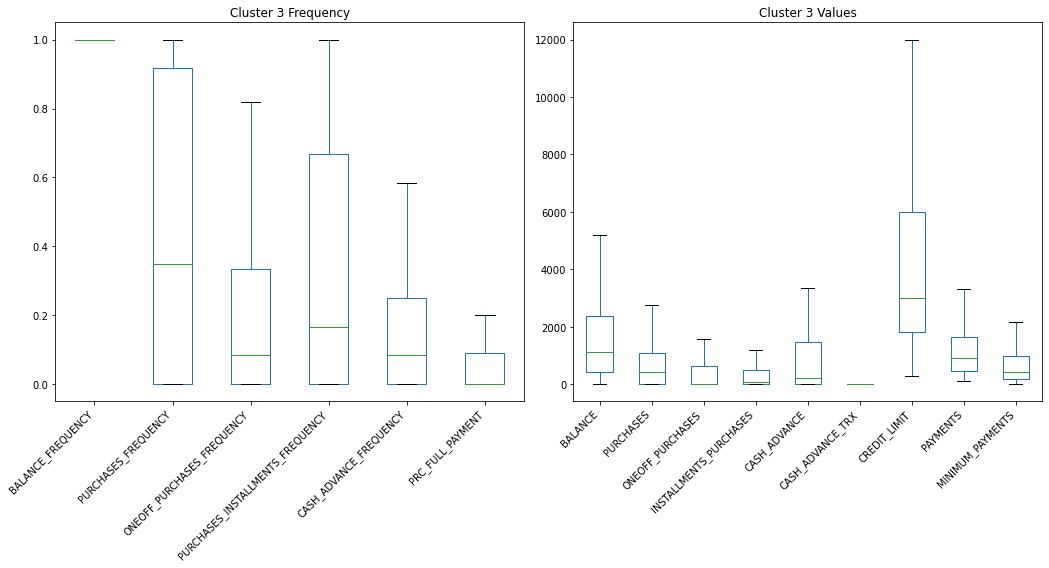

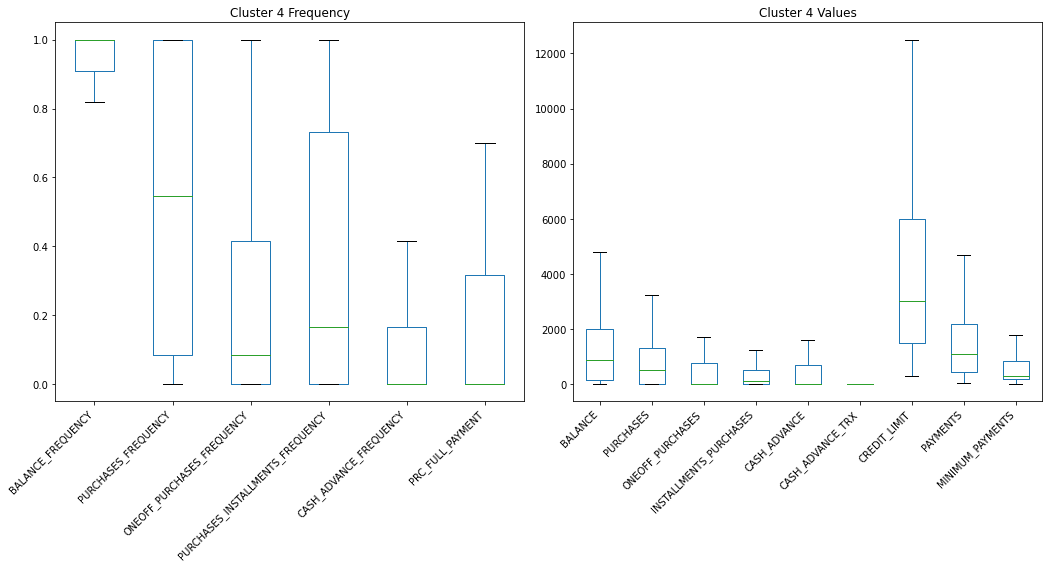

In [28]:
for cl_num in range(cluster_number):
    # Extract index from individual clusters, and merge with original data
    cluster_subset = dat_sample.query('CLUSTER_LABELS == {}'.format(cl_num))
    cluster_index = cluster_subset.index.tolist()
    cluster = pd.DataFrame()
    cluster['index'] = cluster_index
    cluster.set_index('index', inplace = True)
    cluster = pd.merge(cluster, dat, left_on = 'index', right_index = True)
    
    cluster_values = cluster[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                              'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]
    cluster_frequency = cluster[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']]
    
    subplot_boxplots(cluster_frequency, "Cluster " + str(cl_num) + " Frequency", cluster_values, "Cluster " + str(cl_num) + " Values")